# Cameroon Vitamin A Effective Coverage MINIMOD Simulations

-  This uses Vitamin A Eff. Coverage and 6-59 mos. children population data

In [1]:
import pandas as pd
import geopandas as gpd
import minimod
import matplotlib.pyplot as plt
from ipywidgets import fixed, interact, IntSlider

data_folder = '/home/lordflaron/Documents/minimod/optimization_work/demewoz_lives_saved/data_files/'

effective_coverage_folder = data_folder + 'effective_coverage/'
cost_folder = data_folder + 'new_cost_benefits/'


/usr/lib/python3.8/site-packages/geopandas/_compat.py:84: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  warnings.warn(


In [2]:
# Get intervention names to change
va_eff_cov = (
pd.read_excel(effective_coverage_folder + 'April28_Vitamin A_Effective_ coverage.xlsx')
)

long_intervention_names = va_eff_cov['Vitamin A intervention'].unique().tolist()
short_intervention_names = ['cube',
'oilvas',
'maxoil',
'maxoilcube',
'oil',
'maxoilcubevas',
'oilcube',
'oilcubevas',
'maxoilvas',
'vas',
'cubevas',
'clinic',
'maxoilclinic',
'maxoilclinic',
'oilclinic',
'oilclinic',
'cubeclinic',
'oilcubeclinic',
'oilcubeclinic',
'maxoilcubeclinic'
]
intervention_rename_list = {k:v for k,v in zip(long_intervention_names, short_intervention_names)}

In [3]:
va_eff_cov

,Vitamin A intervention,effective_coverage,Zone,effective_coverage_SE
0,Cube(80 mg/kg),21.9,North,2.165260
1,Cube(80 mg/kg),16.4,South,2.382797
2,Cube(80 mg/kg),21.0,Cities,3.078066
3,Oil (12 mg/kg 75 percent coverage)and VA\nsupp...,50.9,North,2.725697
4,Oil (12 mg/kg 75 percent coverage)and VA\nsupp...,25.3,South,2.940741
5,Oil (12 mg/kg 75 percent coverage)and VA\nsupp...,40.8,Cities,1.974863
6,Oil 1 (12 mg/kg 100 percent coverage),19.4,North,2.136797
7,Oil 1 (12 mg/kg 100 percent coverage),10.9,South,2.199161
8,Oil 1 (12 mg/kg 100 percent coverage),30.2,Cities,2.657936
9,Oil 1(12 mg/kg 100 percent coverage)and\nCube(...,40.5,North,4.479688


In [4]:
intervention_rename_list

{'Cube(80 mg/kg)': 'cube',
 'Oil (12 mg/kg 75 percent coverage)and VA\nsupplement CHD': 'oilvas',
 'Oil 1 (12 mg/kg 100 percent coverage)': 'maxoil',
 'Oil 1(12 mg/kg 100 percent coverage)and\nCube(80 mg/kg)': 'maxoilcube',
 'Oil 2 (12 mg/kg 75 percent coverage)': 'oil',
 'Oil(12mg/kg 100 percent coverage) and\ncube(80 mg/kg) and VA Supplement via CHD': 'maxoilcubevas',
 'Oil 2 (12 mg/kg 75 percent coverage)and\ncube(80mg/kg)': 'oilcube',
 'Oil 2(12 mg/kg 75 percent coverage)and\ncube(80mg/kg) and VA supplement via CHD': 'oilcubevas',
 'Oil(12 mg/kg 100 percent coverage)and VA\nsupplementation via CHD': 'maxoilvas',
 'VA Supplementation via CHD (90% in all\nregions)': 'vas',
 'cube(80mg/kg) and VA supplementation via\nCHD': 'cubevas',
 'VAS routine': 'clinic',
 'Oil 1(100%) + VAS routine': 'maxoilclinic',
 'Oil 1(100%) + VAS Routine': 'maxoilclinic',
 'Oil 2(75%) + VAS routine': 'oilclinic',
 'Oil 2(75%) + VAS Routine': 'oilclinic',
 'VAS routine + cube ': 'cubeclinic',
 'Oil75% + cube

## Data Processing

In [5]:
# First load in cost data
costs = pd.read_excel(cost_folder + 'lives_saved_costs.xlsx', sheet_name='costs')

# Then VA Effective Coverage
va_eff_cov = (
pd.read_excel(effective_coverage_folder + 'April28_Vitamin A_Effective_ coverage.xlsx')
.assign(intervention = lambda df: df['Vitamin A intervention'].replace(intervention_rename_list),
region = lambda df: df['Zone'].str.strip())
)

# 6-59 Mos. Children
pop = (
pd.read_excel(effective_coverage_folder + 'Cameroon Population age6-59 months.xlsx', skiprows=1)
.replace({'Region' : {'Urban' : 'Cities'}})
.loc[:, ['Region'] + [f"Sum of {year}" for year in range(2020, 2030,1)]]
.rename({'Region' : 'region'}, axis=1)
)
## Using 2020 - 2029 -> 1-10


In [6]:
a= [1,2,3]

In [7]:
a.append(4)

In [8]:
a

[1, 2, 3, 4]

In [62]:
df_costs

,intervention,region,time,costs
0,clinic,North,1,272446.088714
1,clinic,North,2,275628.733222
2,clinic,North,3,278835.380644
3,clinic,North,4,282035.800694
4,clinic,North,5,285202.786631
...,...,...,...,...
6745,zflourzcubefflour,Cities,6,474733.030251
6746,zflourzcubefflour,Cities,7,443371.200598
6747,zflourzcubefflour,Cities,8,470010.012858
6748,zflourzcubefflour,Cities,9,495990.674913


In [9]:
def year_func(year, col = 'effective_coverage'):
    return lambda df: (df[col]/100)*df[f'Sum of {year}']

df_benefits_mean = (
    va_eff_cov
    .merge(pop, on = 'region')
    .assign(**{str(num + 1) : year_func(year) for num, year in enumerate(range(2020, 2030,1))})
    [['intervention', 'region'] + [str(x) for x in range(1,11,1)]]
    .set_index(['intervention', 'region'])
    .stack()
    .reset_index()
    .rename({'level_2' : 'time',
             0 : 'eff_cov_mean'}, axis=1)
    .assign(time = lambda df: df['time'].astype(int))
)

df_benefits_sd = (
va_eff_cov
.merge(pop, on = 'region')
.assign(
**{str(num + 1) : year_func(year, 'effective_coverage_SE') for num, year in enumerate(range(2020, 2030,1))})
[['intervention', 'region'] + [str(x) for x in range(1,11,1)]]
.set_index(['intervention', 'region'])
.stack()
.reset_index()
.rename({'level_2' : 'time', 0 : 'eff_cov_sd'}, axis=1)
.assign(time = lambda df: df['time'].astype(int))
)

df_benefits = df_benefits_mean.merge(df_benefits_sd, on  = ['intervention', 'region', 'time'])

In [10]:
a = [1,2,3]

In [11]:
df_benefits_mean.set_index(['intervention', 'time'])

region  eff_cov_mean
intervention     time                      
cube             1      North   313721.0040
                 2      North   315975.1710
                 3      North   318435.6360
                 4      North   321711.1095
                 5      North   325939.5615
...                       ...           ...
maxoilcubeclinic 6     Cities   275082.5915
                 7     Cities   281281.4500
                 8     Cities   287317.3020
                 9     Cities   293124.3835
                 10    Cities   298668.2085

[510 rows x 2 columns]

In [12]:
# Create costs
df_costs = (
costs
.set_index(['intervention', 'region'])
.stack()
.reset_index()
.rename({'level_2' : 'time', 0 : 'costs'}, axis=1)
)


In [13]:
id(df_costs)

139947782554624

In [14]:
id(costs)

139947782555584

In [15]:
# Create function to make data adjustments
def observation_adjustment(data, int1, int2, time_to_replace, space_to_replace = slice(None)):
    
    df = data.copy(deep = True)

    if isinstance(int2, str):
        df_int2 = df.loc[(int2, space_to_replace, time_to_replace)]
        df.loc[(int1, space_to_replace, time_to_replace), :] = df_int2.values
    elif int2 == 0:
        df.loc[(int1, space_to_replace, time_to_replace), :] = 0

    print(f"Changed {int1} to {int2}")

    return df

In [16]:
df_benefits_adjusted = (df_benefits.set_index(['intervention', 'region', 'time'])
.pipe(observation_adjustment,
int1 = "cube",
int2 = 0,
time_to_replace = [1,2,3])
.pipe(observation_adjustment,
int1 = "maxoil",
int2 = "oil",
time_to_replace = [1,2])
.pipe(observation_adjustment,
int1 = "maxoilcube",
int2 = "maxoil",
time_to_replace = [1,2,3])
.pipe(observation_adjustment,
int1 = "oilcube",
int2 = "oil",
time_to_replace = [1,2,3])
.pipe(observation_adjustment,
int1 = "oilcubevas",
int2 = "oilvas",
time_to_replace = [1,2,3])
.pipe(observation_adjustment,
int1 = "maxoilcubevas",
int2 = "maxoilvas",
time_to_replace = [1,2,3])
.pipe(observation_adjustment,
int1 = "cubevas",
int2 = "vas",
time_to_replace = [1,2,3])
.pipe(observation_adjustment,
int1 = "cubeclinic",
int2 = "clinic",
time_to_replace = [1,2,3])
.pipe(observation_adjustment,
int1 = "maxoilcubeclinic",
int2 = "maxoilclinic",
time_to_replace = [1,2,3])
.pipe(observation_adjustment,
int1 = "oilcubeclinic",
int2 = "oilclinic",
time_to_replace = [1,2,3])
.pipe(observation_adjustment,
int1 = "maxoilcube",
int2 = "oilcube",
time_to_replace = [1,2])
.pipe(observation_adjustment,
int1 = "maxoilvas",
int2 = "oilvas",
time_to_replace = [1,2])
.pipe(observation_adjustment,
int1 = "maxoilcubevas",
int2 = "oilcubevas",
time_to_replace = [1,2])
.pipe(observation_adjustment,
int1 = "maxoilclinic",
int2 = "oilclinic",
time_to_replace = [1,2])
.pipe(observation_adjustment,
int1 = "maxoilcubeclinic",
int2 = "oilcubeclinic",
time_to_replace = [1,2])
)


Changed cube to 0
Changed maxoil to oil
Changed maxoilcube to maxoil
Changed oilcube to oil
Changed oilcubevas to oilvas
Changed maxoilcubevas to maxoilvas
Changed cubevas to vas
Changed cubeclinic to clinic
Changed maxoilcubeclinic to maxoilclinic
Changed oilcubeclinic to oilclinic
Changed maxoilcube to oilcube
Changed maxoilvas to oilvas
Changed maxoilcubevas to oilcubevas
Changed maxoilclinic to oilclinic
Changed maxoilcubeclinic to oilcubeclinic


/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [17]:
df = df_benefits_adjusted.merge(df_costs, on = ['intervention', 'region', 'time'], how = 'outer', indicator=True)


In [18]:
df._merge.value_counts()

right_only    6240
both           510
left_only        0
Name: _merge, dtype: int64

In [19]:
df = df.loc[df._merge== 'both'].drop(columns = '_merge')

## Summary Tables

In [38]:

s = minimod.utils.summary.PreOptimizationDataSummary(
    data = df.reset_index(),
    benefit_col= 'eff_cov_mean',
    cost_col= 'costs',
    intervention_col='intervention',
    space_col= 'region',
    time_col='time',
    benefit_title='Children Effectively Covered',
    intervention_subset=['clinic', 'vas', 'cube', 'oil', 'maxoil', 'vasoil'],
    intervention_subset_titles={'clinic' : 'VAS Clinic Day', 
    'vas' : 'Vitamin A Supp.', 
    'cube' : 'Boullion Cube',
    'oil' : 'Oil (75%)',
    'maxoil' : 'Oil (100%)',
    'oilvas' : 'BAU: Vitamin A Supp. + Oil (75%)'},
    bau_intervention = 'oilvas'
)

s.summary_table(variables_of_interest= {'Cost per Child ($)' : 'cost_per_benefit'}, grouping = 'over_space', style = 'markdown')

,Intervention,Regions,Children Effectively Covered,Costs ($),Cost per Child ($)
2,VAS Clinic Day,North,"982,175","2,865,447",2.920000
3,VAS Clinic Day,South,"508,783","3,841,020",7.550000
0,VAS Clinic Day,Cities,"337,787","1,122,793",3.320000
1,VAS Clinic Day,National,"1,828,744","7,829,259",4.280000
22,Vitamin A Supp.,North,"5,832,607","10,255,678",1.760000
23,Vitamin A Supp.,South,"3,516,588","13,732,668",3.910000
20,Vitamin A Supp.,Cities,"2,357,751","5,679,748",2.410000
21,Vitamin A Supp.,National,"11,706,947","29,668,094",2.530000
6,Boullion Cube,North,"2,361,042","3,581,390",1.520000
7,Boullion Cube,South,"1,729,070","3,940,174",2.280000


## Optimization



In [42]:
m = minimod.Minimod(solver_type = 'costmin',
data = df,
benefit_col = 'eff_cov_mean',
cost_col = 'costs',
space_col = 'region',
all_space = ['cube', '(?=.*(?<![max])oil)', 'maxoil'],
all_time = ['cube', '(?=.*(?<![max])oil)', 'maxoil'],
time_subset = [1,2,3],
benefit_title = 'Children Effectively Covered (VA)',
minimum_benefit = 'oilvas',
)

[Note]: Processing Data...
[Note]: Creating Base Model with constraints

                MiniMod Nutrition Intervention Tool
                Optimization Method: MIN
                Version: 0.0.6dev
                Solver: CBC,
                Show Output: True
                
                


In [36]:
m

In [44]:
m.fit()

[Note]: Optimizing...
[Note]: Optimal Solution Found


In [45]:
m.report()

+----------------------------+----------------------------+
| MiniMod Solver Results     |                            |
| Method:                    | MIN                        |
| Solver:                    | CBC                        |
| Optimization Status:       | OptimizationStatus.OPTIMAL |
| Number of Solutions Found: | 1                          |
+----------------------------+----------------------------+
+-----------------------------+------+
| No. of Variables:           |  510 |
| No. of Integer Variables:   |  510 |
| No. of Constraints          |  454 |
| No. of Non-zeros in Constr. | 6933 |
+-----------------------------+------+
Interventions Chosen:
+-----------------------------------------+-------------+
| Minimum Benefit                         | 1.24652e+07 |
| Objective Bounds                        | 2.83901e+07 |
| Total Cost                              | 2.83901e+07 |
| Total Children Effectively Covered (VA) | 1.2496e+07  |
+---------------------------------

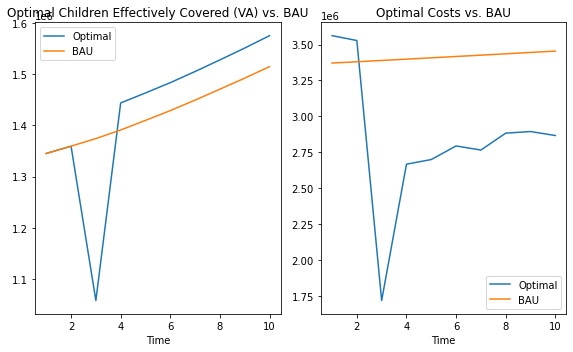

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2,  figsize = (8,5))
m.plot_bau_time(ax=ax1)
m.plot_bau_time(opt_variable = 'c', ax=ax2)
plt.savefig("low_bau.png", dpi=600)

In [17]:
m.opt_df.loc[m.opt_df['opt_vals']>0]['opt_costs'].unstack(level=1)

region                    Cities         North         South
intervention time                                           
oilcube      3     237869.564765           NaN  2.229739e+05
             4     459269.105708           NaN  6.022670e+05
             5     467886.063623           NaN  6.138701e+05
             6     490921.260240           NaN  6.503474e+05
             7     485394.294026           NaN  6.374351e+05
             8     513838.808623           NaN  6.831804e+05
             9     517594.769589           NaN  6.862292e+05
             10    512335.278885           NaN  6.736622e+05
oilcubevas   1     778931.944910  1.224056e+06  1.558544e+06
             2     772372.251279  1.211811e+06  1.543581e+06
             3               NaN  1.260619e+06           NaN
             4               NaN  1.607050e+06           NaN
             5               NaN  1.619276e+06           NaN
             6               NaN  1.654102e+06           NaN
             7               NaN  1.644019e+06           NaN
             8               NaN  1.687236e+06           NaN
             9               NaN  1.691628e+06           NaN
             10              NaN  1.681804e+06           NaN

In [48]:
# Load data
geo_df = gpd.read_file("/home/lordflaron/Documents/minimod/examples/data/maps/cameroon/CAM.shp")

# Now we create the boundaries for North, South and Cities
# Based on "Measuring Costs of Vitamin A..., Table 2"
north = r"Adamaoua|Nord|Extreme-Nord"
south = r"Centre|Est|Nord-Ouest|Ouest|Sud|Sud-Ouest"
cities= r"Littoral" # Duala
# Yaounde is in Mfoundi
geo_df.loc[lambda df: df['ADM1'].str.contains(north), 'space'] = 'North'
geo_df.loc[lambda df: df['ADM1'].str.contains(south), 'space'] = 'South'
geo_df.loc[lambda df: df['ADM1'].str.contains(cities), 'space'] = 'Cities'
geo_df.loc[lambda df: df['ADM2'].str.contains(r"Mfoundi"), 'space'] = 'Cities'

# Now we aggregate the data to the `space` variable
agg_geo_df = geo_df.dissolve(by = 'space')


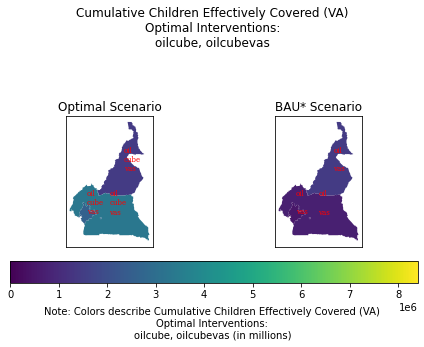

In [60]:
m.plot_map_benchmark(intervention = None, 
time = 2, 
optimum_interest = 'cb', 
bench_intervention = 'oilvas',
map_df = agg_geo_df,
merge_key = 'space',
intervention_in_title = fixeTrue,
intervention_bubbles= fixed(True),
intervention_bubble_names = fixed(['oil', 'cube', 'vas']),
bau_intervention_bubble_names = fixed(['oil', 'cube', 'vas']),
save = fixed(None))

In [52]:
interact()

import warnings
warnings.filterwarnings("ignore")

interactive(children=(IntSlider(value=1, description='time', max=10, min=1), Dropdown(description='optimum_int…

### Different Constraint Reports

In [20]:
models = {}

for opt_type in [None, 'time', 'space', 'both']:

    print(f"Running with {opt_type}")

    m = minimod.Minimod(solver_type = 'costmin',
    data = df,
    benefit_col = 'eff_cov_mean',
    cost_col = 'costs',
    space_col = 'region',
    all_space = ['cube', '(?=.*(?<![max])oil)', 'maxoil'],
    all_time = ['cube', '(?=.*(?<![max])oil)', 'maxoil'],
    time_subset = [1,2,3],
    benefit_title = 'Children Effectively Covered (VA)',
    minimum_benefit = 'oilvas',
    main_constraint_over = opt_type
    )

    models[opt_type] = m.fit()

Running with None
[Note]: Processing Data...
[Note]: Creating Base Model with constraints

                MiniMod Nutrition Intervention Tool
                Optimization Method: MIN
                Version: 0.0.6dev
                Solver: CBC,
                Show Output: True
                
                
[Note]: Optimizing...
[Note]: Optimal Solution Found
Running with time
[Note]: Processing Data...
[Note]: Creating Base Model with constraints

                MiniMod Nutrition Intervention Tool
                Optimization Method: MIN
                Version: 0.0.6dev
                Solver: CBC,
                Show Output: True
                
                
[Note]: Optimizing...
[Note]: Optimal Solution Found
Running with space
[Note]: Processing Data...
[Note]: Creating Base Model with constraints

                MiniMod Nutrition Intervention Tool
                Optimization Method: MIN
                Version: 0.0.6dev
                Solver: CBC,
                

### Reports

In [21]:
def report_model(m):

    return getattr(m, 'report')()

In [22]:
interact(report_model, 
m= models)

interactive(children=(Dropdown(description='m', options={None: <minimod.solvers.costsolver.CostSolver object a…

<function __main__.report_model(m)>

### BAU Plots

In [23]:
def plot_bau_model(m):

    fig, (ax1, ax2) = plt.subplots(1,2,  figsize = (8,5))
    getattr(m, 'plot_bau_time')(ax=ax1)
    getattr(m, 'plot_bau_time')(opt_variable = 'c', ax=ax2)

In [24]:
interact(plot_bau_model, 
m= models)

interactive(children=(Dropdown(description='m', options={None: <minimod.solvers.costsolver.CostSolver object a…

<function __main__.plot_bau_model(m)>

### Maps

In [25]:
def plot_map_model(m, **kwargs):

    return getattr(m, 'plot_map_benchmark')(**kwargs)

In [26]:
interact(plot_map_model,
m= models,
intervention = fixed(None), 
time = IntSlider(min=1, max=10, step=1, value=1), 
optimum_interest = ['b', 'c', 'cdb', 'cdc', 'cb', 'cc'], 
bench_intervention = fixed('oilvas'),
map_df = fixed(agg_geo_df),
merge_key = fixed('space'),
intervention_in_title = fixed(True),
intervention_bubbles= fixed(True),
intervention_bubble_names = fixed(['oil', 'vas', 'cube']),
bau_intervention_bubbles = fixed(['oil', 'vas', 'cube']),
save = fixed(None))

SyntaxError: invalid syntax (<ipython-input-26-3b01fdbcec47>, line 13)

In [27]:
intervention_rename_list

{'Cube(80 mg/kg)': 'cube',
 'Oil (12 mg/kg 75 percent coverage)and VA\nsupplement CHD': 'oilvas',
 'Oil 1 (12 mg/kg 100 percent coverage)': 'maxoil',
 'Oil 1(12 mg/kg 100 percent coverage)and\nCube(80 mg/kg)': 'maxoilcube',
 'Oil 2 (12 mg/kg 75 percent coverage)': 'oil',
 'Oil(12mg/kg 100 percent coverage) and\ncube(80 mg/kg) and VA Supplement via CHD': 'maxoilcubevas',
 'Oil 2 (12 mg/kg 75 percent coverage)and\ncube(80mg/kg)': 'oilcube',
 'Oil 2(12 mg/kg 75 percent coverage)and\ncube(80mg/kg) and VA supplement via CHD': 'oilcubevas',
 'Oil(12 mg/kg 100 percent coverage)and VA\nsupplementation via CHD': 'maxoilvas',
 'VA Supplementation via CHD (90% in all\nregions)': 'vas',
 'cube(80mg/kg) and VA supplementation via\nCHD': 'cubevas',
 'VAS routine': 'clinic',
 'Oil 1(100%) + VAS routine': 'maxoilclinic',
 'Oil 1(100%) + VAS Routine': 'maxoilclinic',
 'Oil 2(75%) + VAS routine': 'oilclinic',
 'Oil 2(75%) + VAS Routine': 'oilclinic',
 'VAS routine + cube ': 'cubeclinic',
 'Oil75% + cube